In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Load env variables
load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

# Create connection
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")


In [3]:
q1 = "SELECT ROUND(AVG(churn::numeric) * 100, 2) AS churn_rate_percent FROM telco_churn;"
overall_churn = pd.read_sql(q1, engine)
print("📊 Overall Churn Rate (%):", overall_churn.iloc[0,0])


📊 Overall Churn Rate (%): 26.54


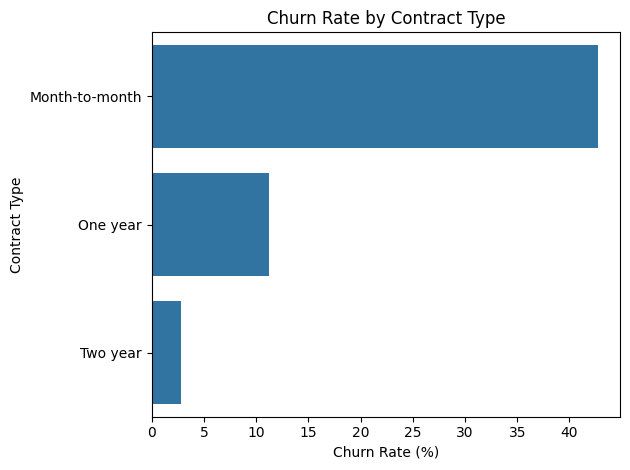

In [4]:
q2 = """
SELECT contract, ROUND(AVG(churn::numeric)*100,2) AS churn_rate_percent
FROM telco_churn
GROUP BY contract
ORDER BY churn_rate_percent DESC;
"""
contract_churn = pd.read_sql(q2, engine)

sns.barplot(x='churn_rate_percent', y='contract', data=contract_churn)
plt.title("Churn Rate by Contract Type")
plt.xlabel("Churn Rate (%)")
plt.ylabel("Contract Type")
plt.tight_layout()
plt.show()


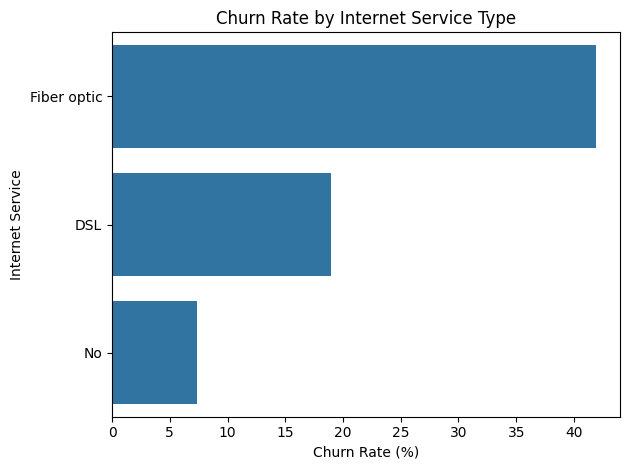

In [5]:
q3 = """
SELECT internetservice, ROUND(AVG(churn::numeric)*100,2) AS churn_rate_percent
FROM telco_churn
GROUP BY internetservice
ORDER BY churn_rate_percent DESC;
"""
internet_churn = pd.read_sql(q3, engine)

sns.barplot(x='churn_rate_percent', y='internetservice', data=internet_churn)
plt.title("Churn Rate by Internet Service Type")
plt.xlabel("Churn Rate (%)")
plt.ylabel("Internet Service")
plt.tight_layout()
plt.show()


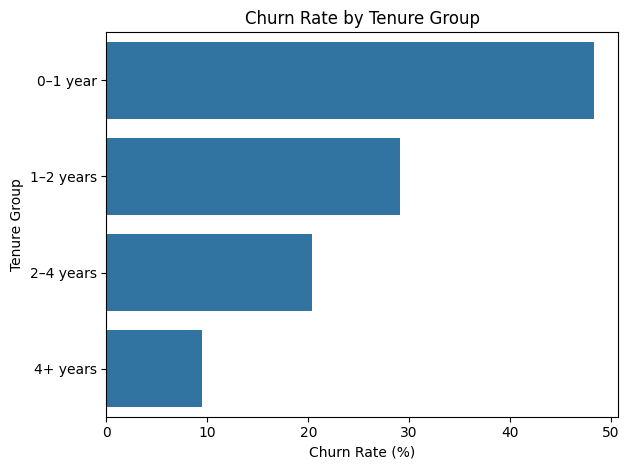

In [6]:
q6 = """
SELECT 
    CASE 
        WHEN tenure < 12 THEN '0–1 year'
        WHEN tenure BETWEEN 12 AND 24 THEN '1–2 years'
        WHEN tenure BETWEEN 25 AND 48 THEN '2–4 years'
        ELSE '4+ years'
    END AS tenure_group,
    ROUND(AVG(churn::numeric)*100,2) AS churn_rate_percent
FROM telco_churn
GROUP BY tenure_group
ORDER BY churn_rate_percent DESC;
"""
tenure_churn = pd.read_sql(q6, engine)

sns.barplot(x='churn_rate_percent', y='tenure_group', data=tenure_churn)
plt.title("Churn Rate by Tenure Group")
plt.xlabel("Churn Rate (%)")
plt.ylabel("Tenure Group")
plt.tight_layout()
plt.show()


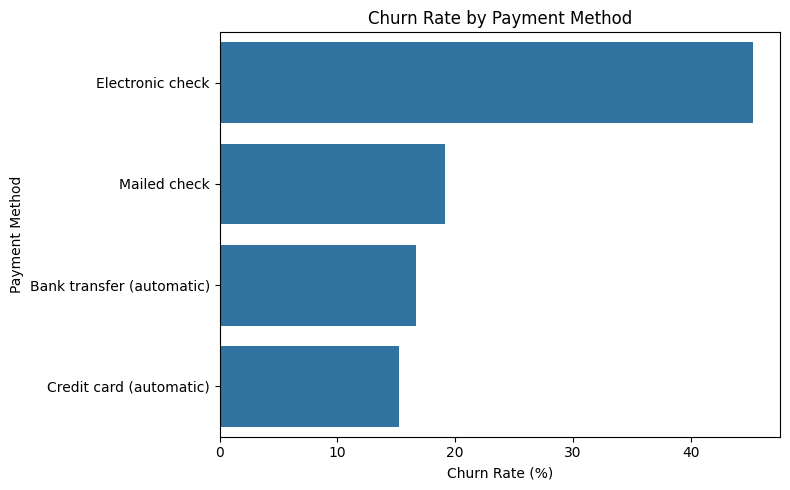

In [7]:
q4 = """
SELECT paymentmethod, ROUND(AVG(churn::numeric)*100,2) AS churn_rate_percent
FROM telco_churn
GROUP BY paymentmethod
ORDER BY churn_rate_percent DESC;
"""
payment_churn = pd.read_sql(q4, engine)

plt.figure(figsize=(8,5))
sns.barplot(y='paymentmethod', x='churn_rate_percent', data=payment_churn)
plt.title("Churn Rate by Payment Method")
plt.xlabel("Churn Rate (%)")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()
